In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

In [6]:
pca = PCA(n_components=3)
sample=pca.fit_transform(data1)
pca.explained_variance_ratio_

array([0.60859767, 0.26036452, 0.13103781])

In [7]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

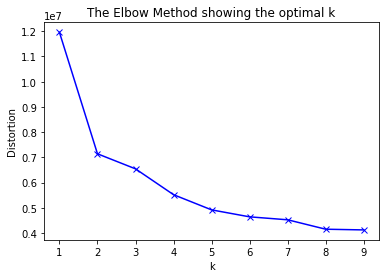

In [8]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
slope

[[2, -4816745.965171217],
 [3, -596430.072483289],
 [4, -1024417.5216327859],
 [5, -601618.5125965318],
 [6, -276054.48972514085],
 [7, -117068.72012038529],
 [8, -373191.9696034058],
 [9, -27744.332423480693]]

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 6


In [16]:
kmeansModel_new = KMeans(n_clusters=6)
labels=kmeansModel_new.fit_predict(sample)

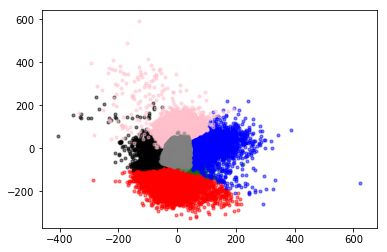

In [17]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()

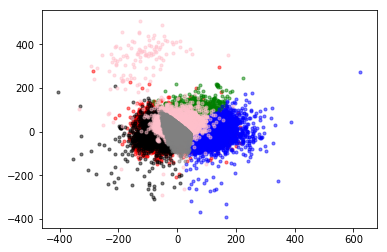

In [18]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,2],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,2],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,2],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,2],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,2],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,2],s=area,c='grey',alpha=0.5)
plt.show()

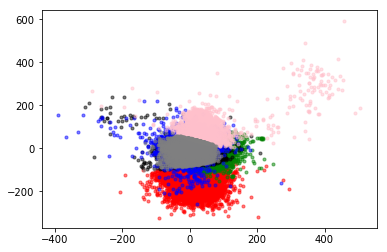

In [19]:
area = np.pi*3
plt.scatter(sample[labels==0,2],sample[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,2],sample[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,2],sample[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,2],sample[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,2],sample[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,2],sample[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()

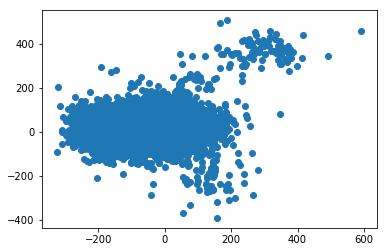

In [20]:
plt.scatter(sample[:,1],sample[:,2])